In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/near_miss_1.csv')
df.head()
# for i in range(4030):
#     if df['pha'][i] == 0: df['pha'][i]=1
#     else: df['pha'][i]=0

df['pha'].value_counts()

0.0    2015
1.0    2015
Name: pha, dtype: int64

In [3]:
df.iloc[:,1:-1].describe()

,a,e,om,w,q,ad,H,moid,n,ma
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000
mean,1.830311,0.485568,168.226738,181.761808,0.880456,2.780165,21.026561,0.092366,0.496015,178.786081
std,0.972290,0.176945,98.561880,96.955435,0.279144,1.910156,2.419451,0.128118,0.278883,117.043394
min,0.618029,0.012077,0.086611,0.240372,0.070511,0.947978,14.000000,0.000041,0.002816,0.034200
25%,1.361980,0.360859,82.841475,100.045126,0.712449,1.865888,19.400000,0.015271,0.293154,64.536122
50%,1.801243,0.491285,168.130927,192.215483,0.903950,2.703116,20.800000,0.033551,0.407705,172.386399
75%,2.244255,0.612605,240.248564,261.512915,1.030905,3.512843,22.100000,0.105213,0.620080,298.134936
max,49.661585,0.995869,359.849201,359.832116,1.506417,99.118039,29.681000,0.499861,2.028573,359.989549


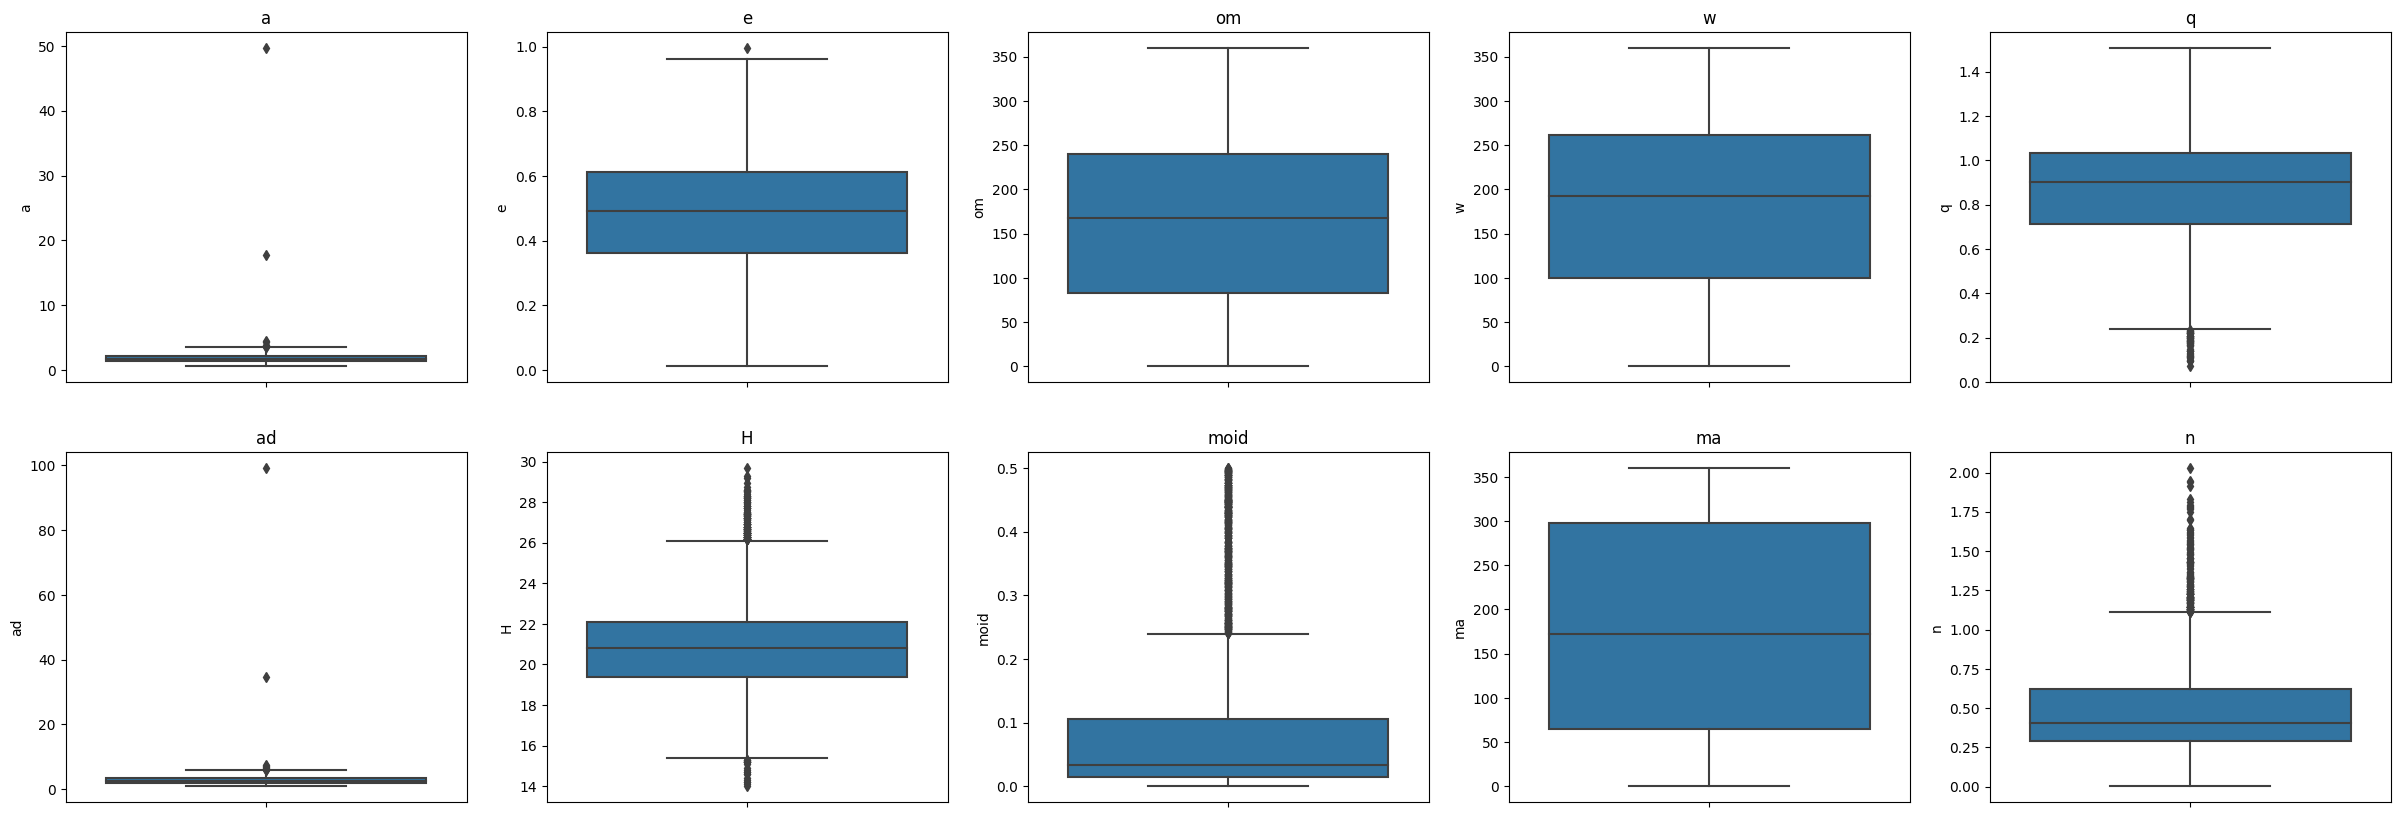

In [4]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.boxplot(ax=axis[0,0], data=df, y='a')
axis[0,0].set_title('a')

sns.boxplot(ax=axis[0,1], data=df, y='e')
axis[0,1].set_title('e')

sns.boxplot(ax=axis[0,2], data=df, y='om')
axis[0,2].set_title('om')

sns.boxplot(ax=axis[0,3], data=df, y='w')
axis[0,3].set_title('w')

sns.boxplot(ax=axis[0,4], data=df, y='q')
axis[0,4].set_title('q')

sns.boxplot(ax=axis[1,0], data=df,  y='ad')
axis[1,0].set_title('ad')

sns.boxplot(ax=axis[1,1], data=df, y='H')
axis[1,1].set_title('H')

sns.boxplot(ax=axis[1,2], data=df, y='moid')
axis[1,2].set_title('moid')

sns.boxplot(ax=axis[1,3], data=df, y='ma')
axis[1,3].set_title('ma')

sns.boxplot(ax=axis[1,4], data=df, y='n')
axis[1,4].set_title('n')

plt.savefig('plots/nm1/dist_with_outliers.png')
plt.show()

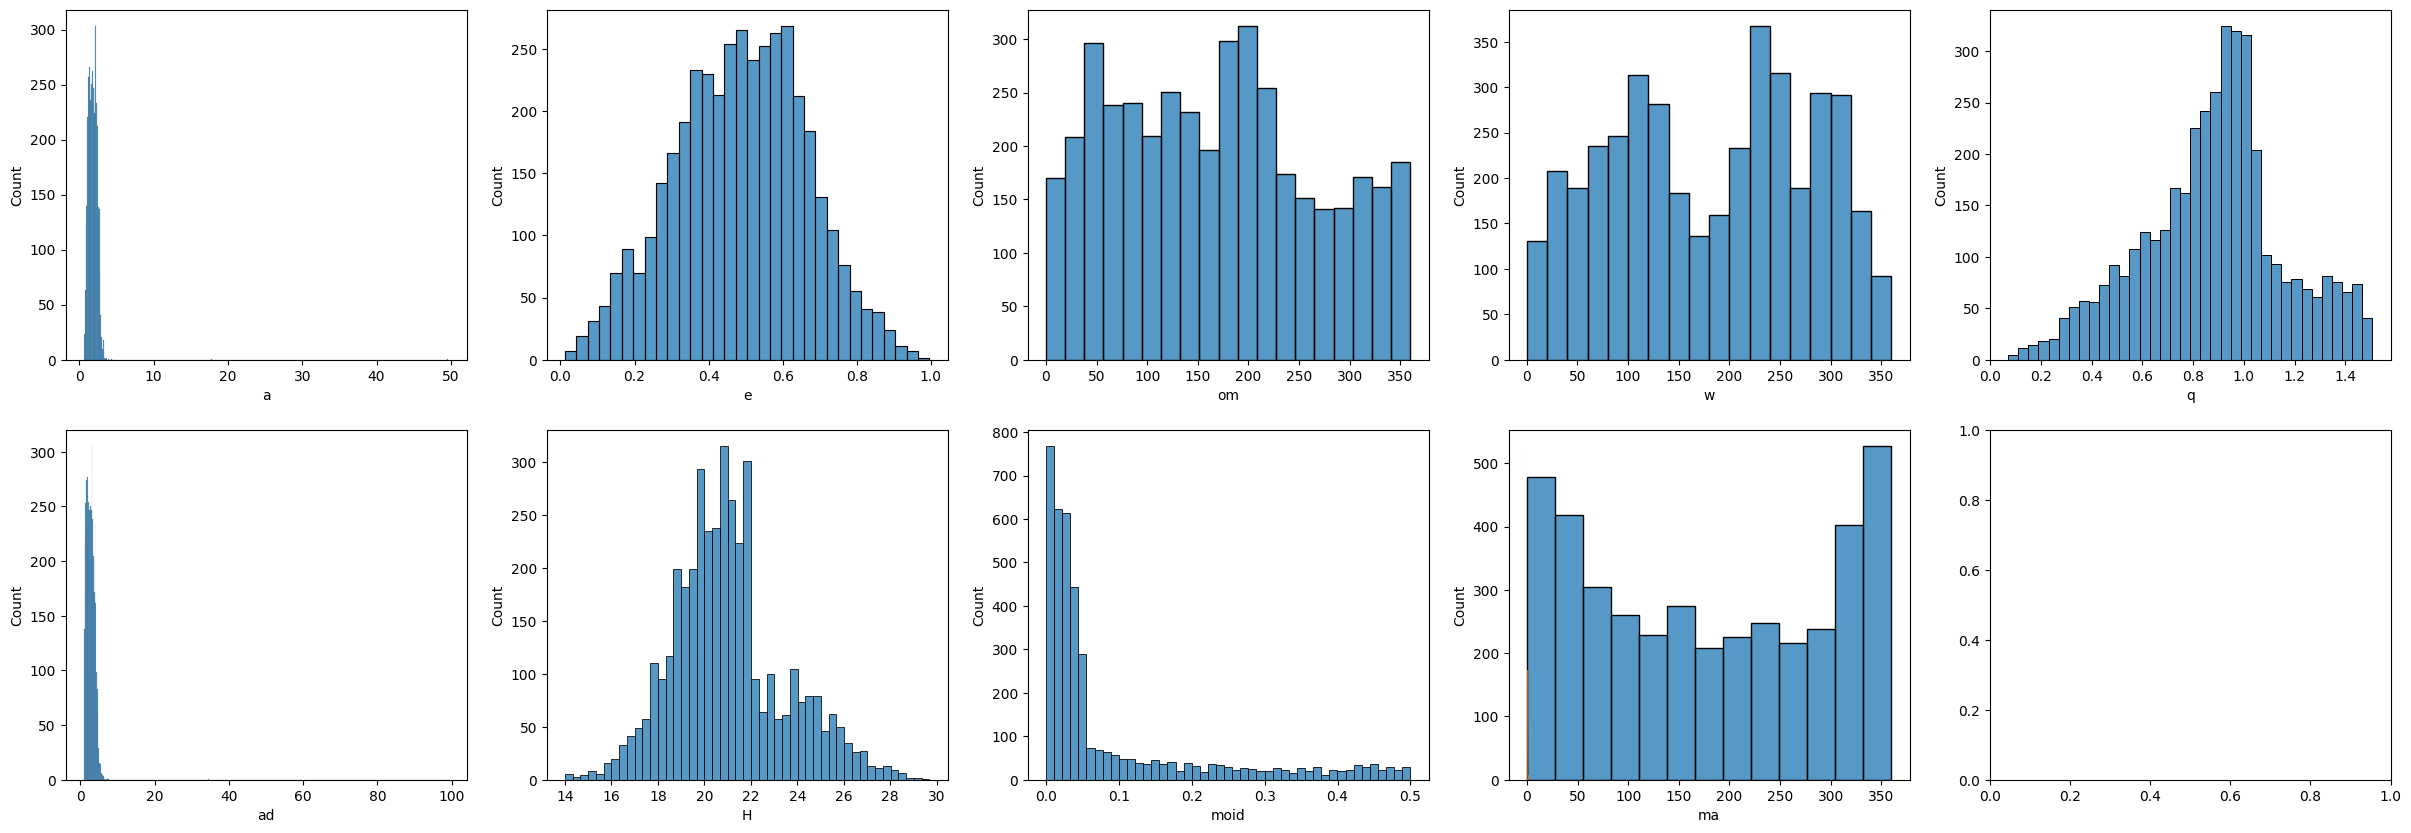

In [5]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.histplot(ax=axis[0,0], data=df, x='a')

sns.histplot(ax=axis[0,1], data=df, x='e')

sns.histplot(ax=axis[0,2], data=df, x='om')

sns.histplot(ax=axis[0,3], data=df, x='w')

sns.histplot(ax=axis[0,4], data=df, x='q')

sns.histplot(ax=axis[1,0], data=df,  x='ad')

sns.histplot(ax=axis[1,1], data=df, x='H')

sns.histplot(ax=axis[1,2], data=df, x='moid')

sns.histplot(ax=axis[1,3], data=df, x='ma')

sns.histplot(ax=axis[1,3], data=df, x='n')

plt.savefig('plots/nm1/hist_with_outliers.png')
plt.show()

In [6]:
col_names = list(df.columns.values)

for c_name in col_names[1:-1]:
    quant_25 = df[c_name].quantile(0.25)
    quant_75 = df[c_name].quantile(0.75)
    iqr = quant_75 - quant_25
    outliers = [True if (val < quant_25-(1.5*iqr) or val > quant_75+(1.5*iqr)) else False for val in df[c_name]]
    
    
    df[c_name] = np.where(outliers, np.nan, df[c_name])

In [7]:
for c_name in col_names[1:-1]:
    grouped_mean = df.groupby(["neo", "pha"])[c_name].quantile(0.50)
    neo0 = [val[0] and val[1] for val in zip(df[c_name].isna(),df['neo'] == 0)]
    neo1_pha0 = [val[0] and val[1] and val[2] for val in zip(df[c_name].isna(), df['neo'] == 1, df['pha'] == 0 )]

    df[c_name] = np.where(neo0, grouped_mean[0][0], df[c_name])
    df[c_name] = np.where(neo1_pha0, grouped_mean[1][0], df[c_name])
    df[c_name] = np.where(df[c_name].isna(), grouped_mean[1][1], df[c_name])

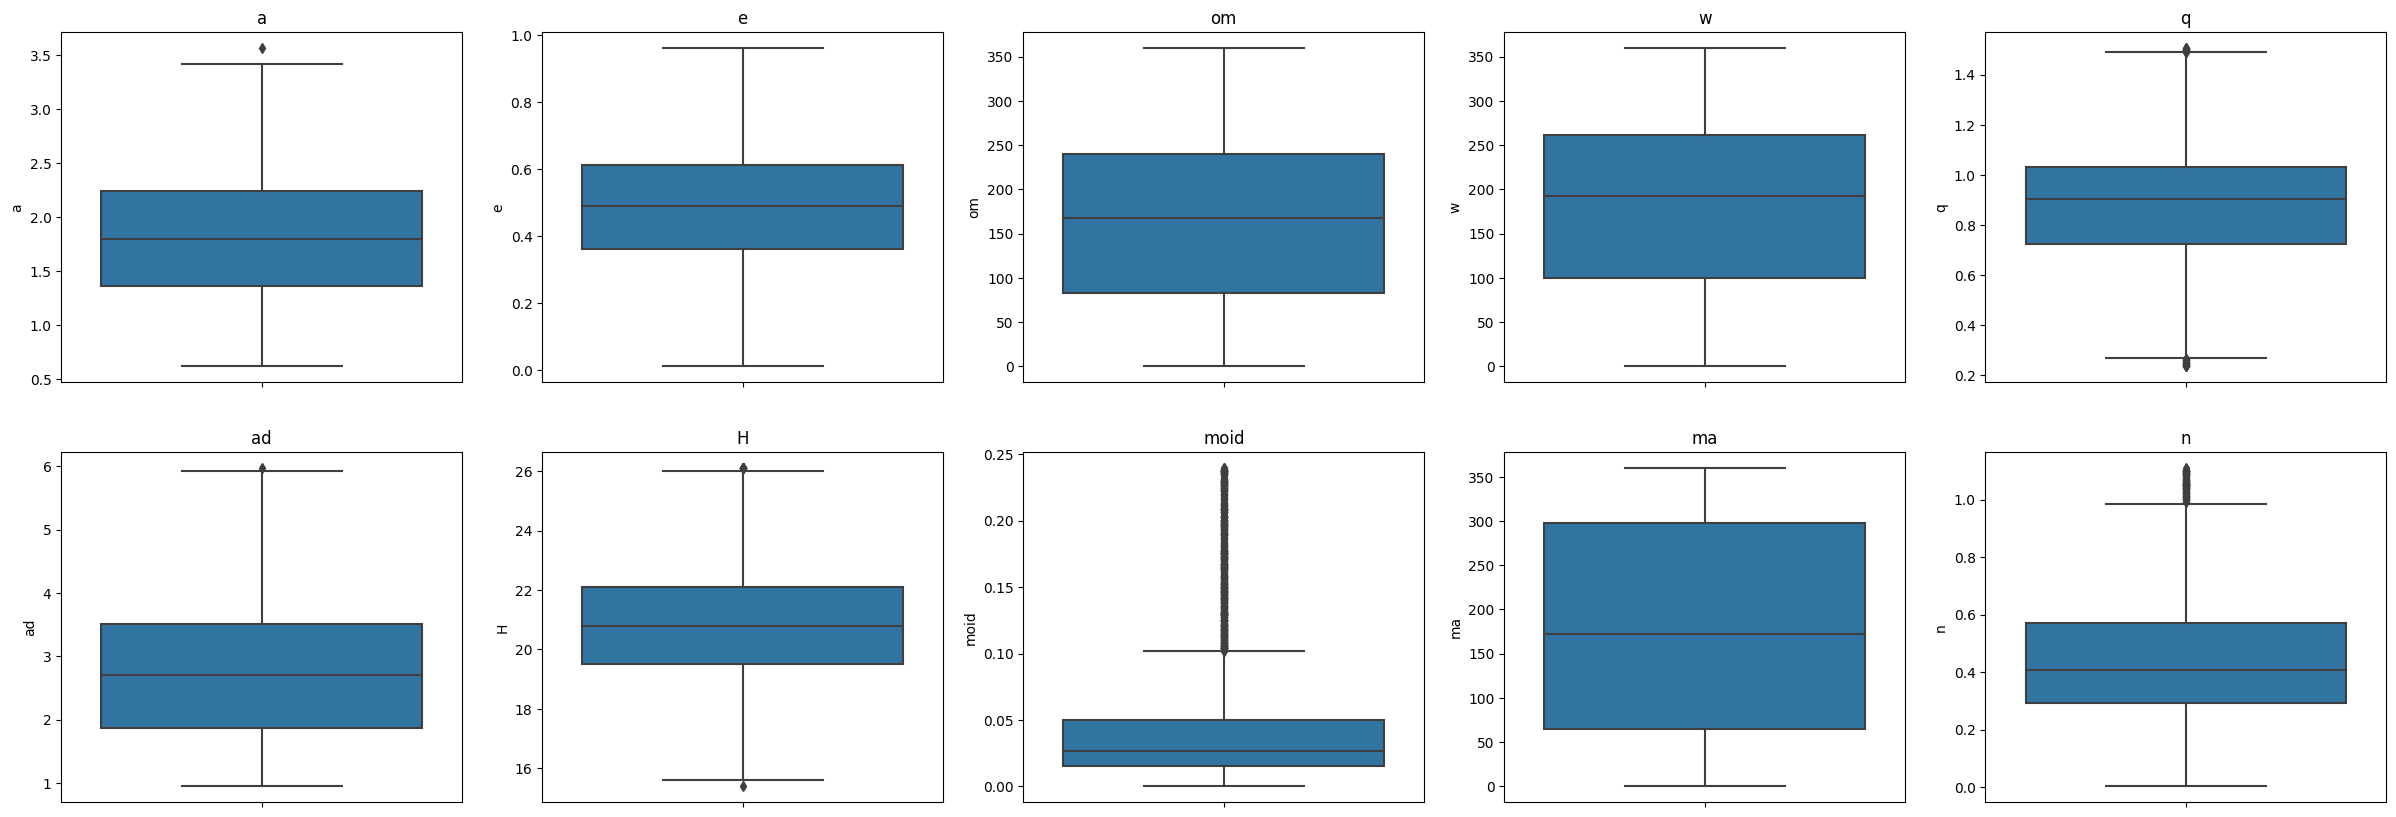

In [8]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.boxplot(ax=axis[0,0], data=df, y='a')
axis[0,0].set_title('a')

sns.boxplot(ax=axis[0,1], data=df, y='e')
axis[0,1].set_title('e')

sns.boxplot(ax=axis[0,2], data=df, y='om')
axis[0,2].set_title('om')

sns.boxplot(ax=axis[0,3], data=df, y='w')
axis[0,3].set_title('w')

sns.boxplot(ax=axis[0,4], data=df, y='q')
axis[0,4].set_title('q')

sns.boxplot(ax=axis[1,0], data=df,  y='ad')
axis[1,0].set_title('ad')

sns.boxplot(ax=axis[1,1], data=df, y='H')
axis[1,1].set_title('H')

sns.boxplot(ax=axis[1,2], data=df, y='moid')
axis[1,2].set_title('moid')

sns.boxplot(ax=axis[1,3], data=df, y='ma')
axis[1,3].set_title('ma')

sns.boxplot(ax=axis[1,4], data=df, y='n')
axis[1,4].set_title('n')

plt.savefig('plots/nm1/dist.png')
plt.show()

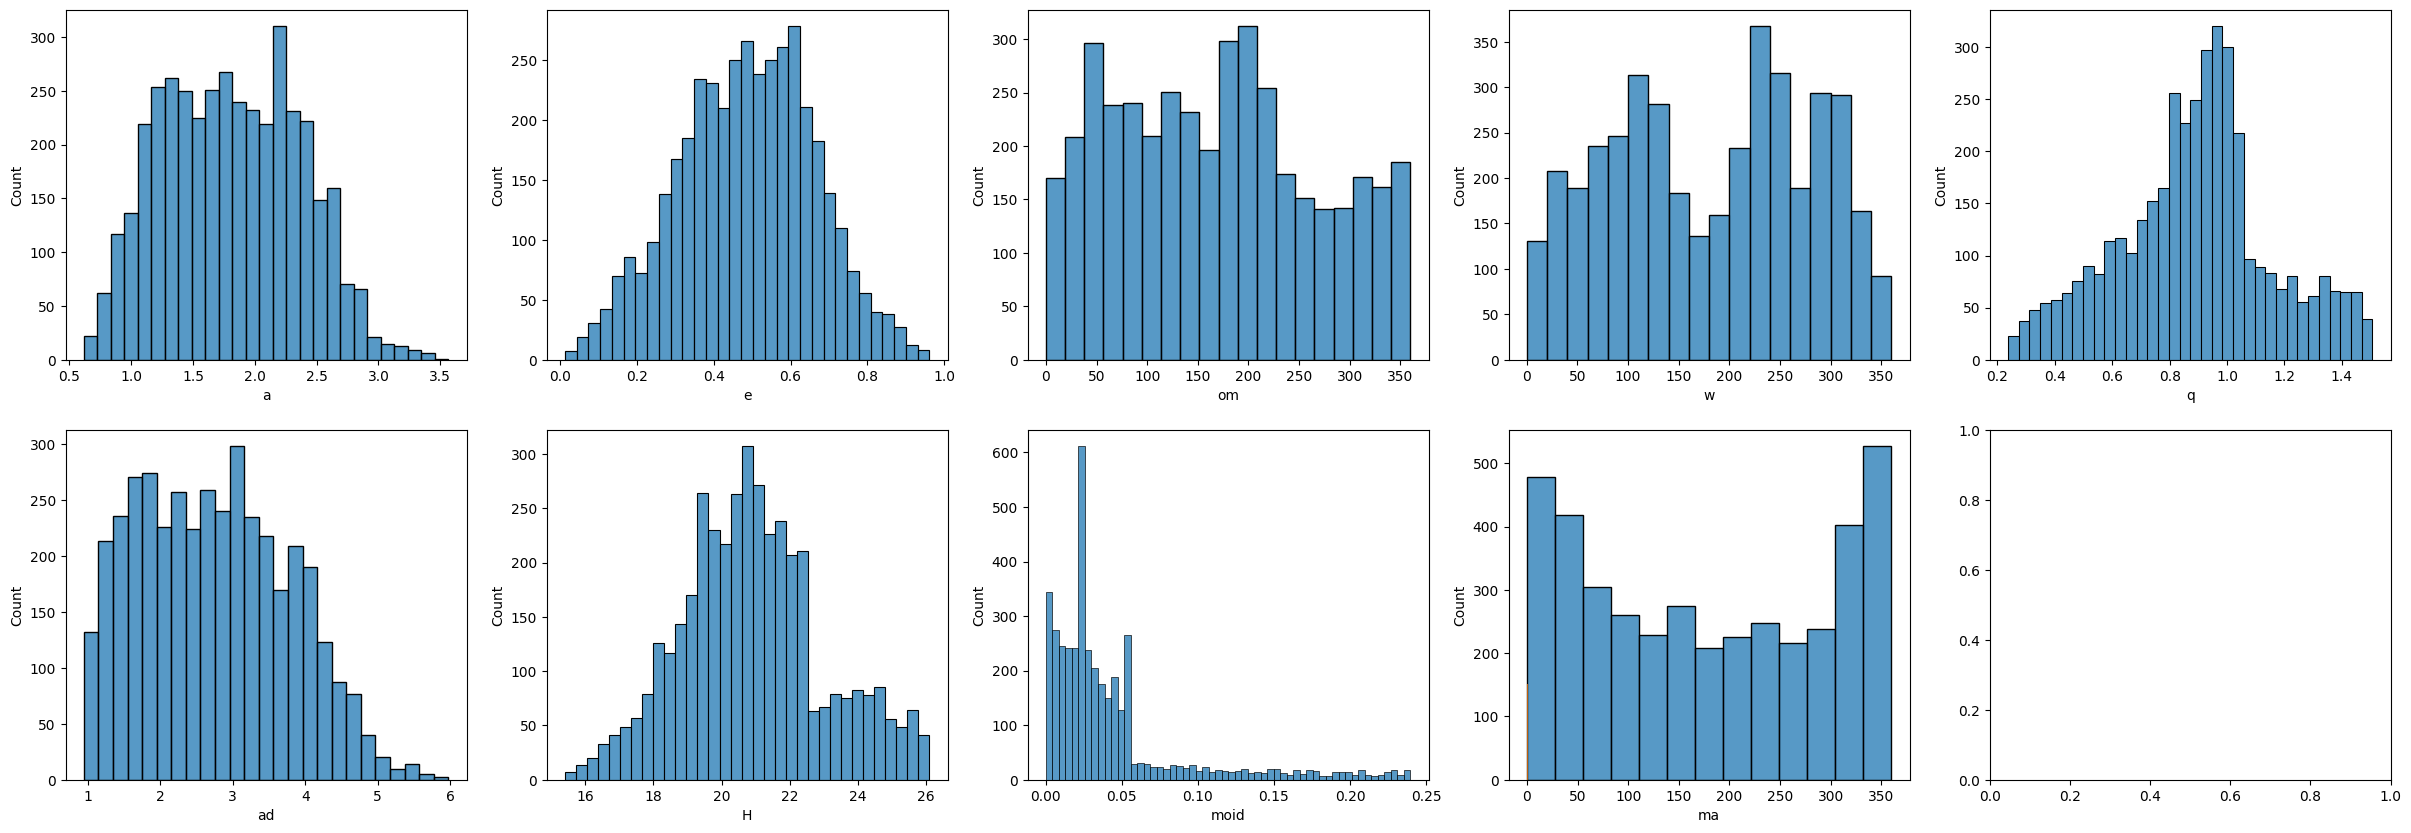

In [9]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.histplot(ax=axis[0,0], data=df, x='a')

sns.histplot(ax=axis[0,1], data=df, x='e')

sns.histplot(ax=axis[0,2], data=df, x='om')

sns.histplot(ax=axis[0,3], data=df, x='w')

sns.histplot(ax=axis[0,4], data=df, x='q')

sns.histplot(ax=axis[1,0], data=df,  x='ad')

sns.histplot(ax=axis[1,1], data=df, x='H')

sns.histplot(ax=axis[1,2], data=df, x='moid')

sns.histplot(ax=axis[1,3], data=df, x='ma')

sns.histplot(ax=axis[1,3], data=df, x='n')

plt.savefig('plots/nm1/hist.png')
plt.show()

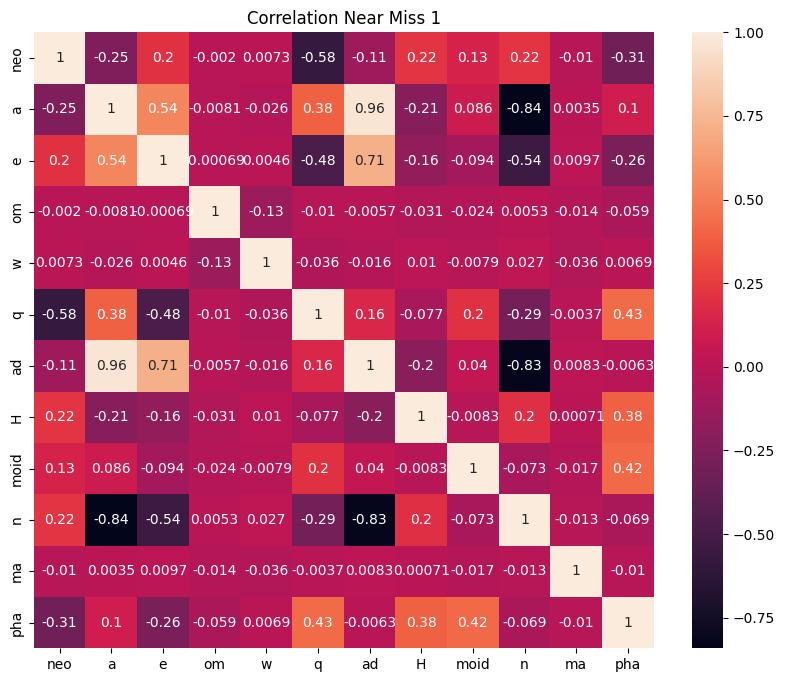

In [10]:
for i in range(4030):
    if df['pha'][i] == 0: df['pha'][i]=1
    else: df['pha'][i]=0

corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Near Miss 1')
plt.savefig('plots/nm1/corr_heatmap.png')

In [11]:
working_df = df[['neo','e','q','pha']]
working_df.head()

,neo,e,q,pha
0,1.0,0.447392,0.806840,1.0
1,1.0,0.482197,1.017003,1.0
2,1.0,0.300315,1.047454,1.0
3,1.0,0.513101,1.079650,1.0
4,1.0,0.512421,0.461812,1.0


In [12]:
from sklearn.model_selection import train_test_split

X = working_df.drop('pha', axis='columns')
y = working_df['pha']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X, y)

for val in zip(pvalues, working_df.columns): print(f'{val[1]}:\t{val[0]}')

neo:	8.803055722116842e-09
e:	2.9287841958972105e-05
q:	7.242772864760287e-15


In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf

## SMV linear

Accuracy: 0.69
Sensitivity: 0.67
Specificty: 0.71


<AxesSubplot: >

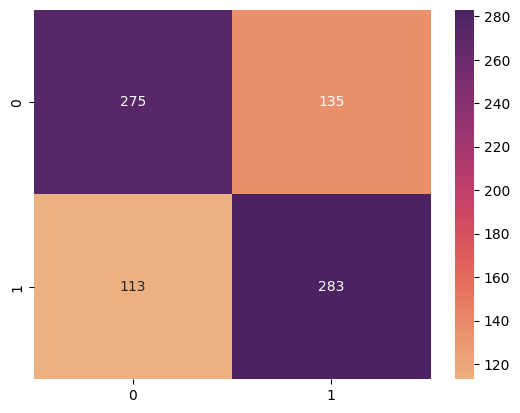

In [16]:
svc_linear = SVC(kernel='linear', random_state=0).fit(X_train_std, y_train)
y_pred = svc_linear.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [17]:
accuracies = cross_val_score(estimator=svc_linear, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 68.46%
Standard Deviation: 2.12%


## SVM rbf

Accuracy: 0.72
Sensitivity: 0.65
Specificty: 0.88


<AxesSubplot: >

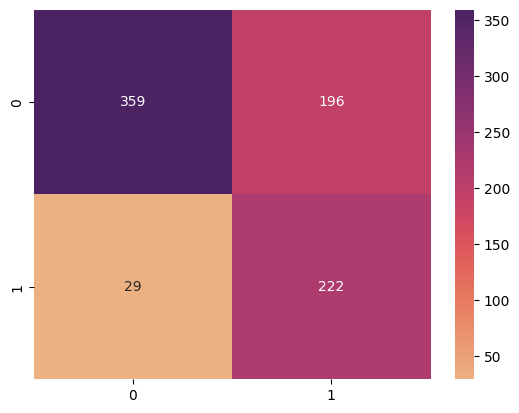

In [18]:
svc_rbf = SVC(kernel='rbf', random_state=0).fit(X_train_std, y_train)
y_pred = svc_rbf.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [19]:
accuracies = cross_val_score(estimator=svc_rbf, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 71.71%
Standard Deviation: 1.67%


## SVM best model

In [20]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

gs = GridSearchCV(estimator=svc_linear, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 71.74%
Best Parameters: {'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}


In [30]:
gs_dict = gs.cv_results_
gs_dict['mean_test_score']

array([0.68487107, 0.68455954, 0.68455954, 0.68455954, 0.71000038,
       0.71186278, 0.71217045, 0.71433763, 0.71371748, 0.71216853,
       0.71340884, 0.71248005, 0.71278965, 0.71279349, 0.71402996,
       0.71588562, 0.71619907, 0.71527027, 0.71434052, 0.71496164,
       0.71434148, 0.71372036, 0.7121743 , 0.71557795, 0.7165077 ,
       0.71713074, 0.71558083, 0.71403092, 0.71310021, 0.71278965,
       0.71248197, 0.71310309, 0.71712786, 0.71743842, 0.71620099,
       0.71558179, 0.71434148, 0.71341269, 0.71403477, 0.7155866 ])

## Random Forest

Accuracy: 0.73
Sensitivity: 0.65
Specificty: 0.91


<AxesSubplot: >

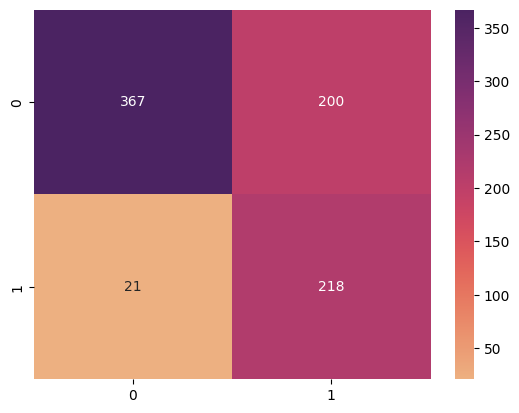

In [60]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, random_state=0).fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [61]:
accuracies = cross_val_score(estimator=rf, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 71.03%
Standard Deviation: 1.69%


## Best Random Forest

In [62]:
parameters = [{'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7, 9], 'n_estimators': [40, 60, 80, 100, 120, 140, 160, 180, 200]}]

gs = GridSearchCV(estimator=rf, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 71.68%
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 60}


## KNN

Accuracy: 0.70
Sensitivity: 0.67
Specificty: 0.73


<AxesSubplot: >

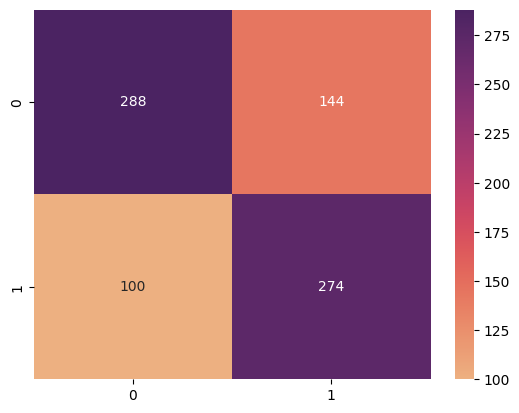

In [63]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski').fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [64]:
accuracies = cross_val_score(estimator=knn, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 67.93%
Standard Deviation: 1.98%


## Best KNN

In [65]:
parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}]

gs = GridSearchCV(estimator=knn, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 69.91%
Best Parameters: {'n_neighbors': 17}


## ANN

In [66]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_std, y_train, batch_size=32, epochs=100)

Epoch 1/100
101/101 [==============================] - 0s 590us/step - loss: 0.6935 - accuracy: 0.4944
Epoch 2/100
101/101 [==============================] - 0s 609us/step - loss: 0.6462 - accuracy: 0.5971
Epoch 3/100
101/101 [==============================] - 0s 590us/step - loss: 0.6194 - accuracy: 0.6374
Epoch 4/100
101/101 [==============================] - 0s 590us/step - loss: 0.6030 - accuracy: 0.6538
Epoch 5/100
101/101 [==============================] - 0s 600us/step - loss: 0.5914 - accuracy: 0.6576
Epoch 6/100
101/101 [==============================] - 0s 600us/step - loss: 0.5826 - accuracy: 0.6650
Epoch 7/100
101/101 [==============================] - 0s 610us/step - loss: 0.5761 - accuracy: 0.6669
Epoch 8/100
101/101 [==============================] - 0s 610us/step - loss: 0.5708 - accuracy: 0.6721
Epoch 9/100
101/101 [==============================] - 0s 580us/step - loss: 0.5665 - accuracy: 0.6783
Epoch 10/100
101/101 [==============================] - 0s 590us/step - l

In [67]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [68]:
def metrics(cf_matrix):
    accuracy = (cf_matrix[0,0]+cf_matrix[1,1])/(cf_matrix[0,0]+cf_matrix[1,0]+cf_matrix[0,1]+cf_matrix[1,1])
    precision = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
    sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
    specificity = cf_matrix[1,1]/(cf_matrix[1,1]+cf_matrix[1,0])

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificty: {specificity:.2f}')

# BEST MODELS

Accuracy: 0.72
Precision: 0.92
Sensitivity: 0.65
Specificty: 0.88


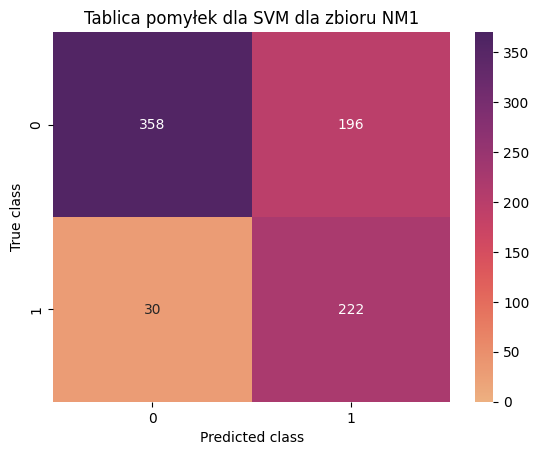

In [69]:
svc_rbf = SVC(kernel='rbf', C=0.75, gamma=0.4, random_state=0).fit(X_train_std, y_train)
y_pred = svc_rbf.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla SVM dla zbioru NM1')
plt.savefig('conf_matrix/nm1_svm.png')

Accuracy: 0.72
Precision: 0.94
Sensitivity: 0.65
Specificty: 0.90


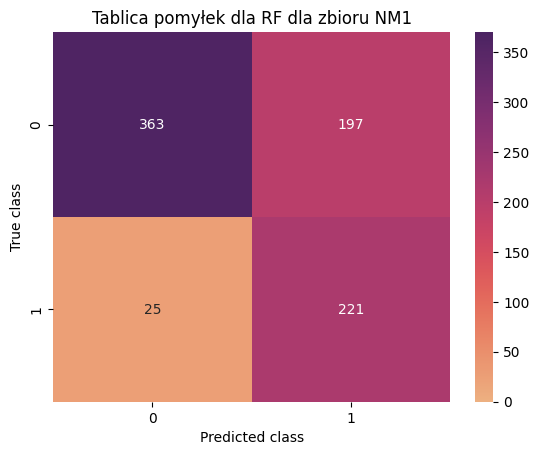

In [70]:
rf = RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=60, random_state=0).fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)


plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla RF dla zbioru NM1')
plt.savefig('conf_matrix/nm1_rf.png')

Accuracy: 0.70
Precision: 0.82
Sensitivity: 0.65
Specificty: 0.78


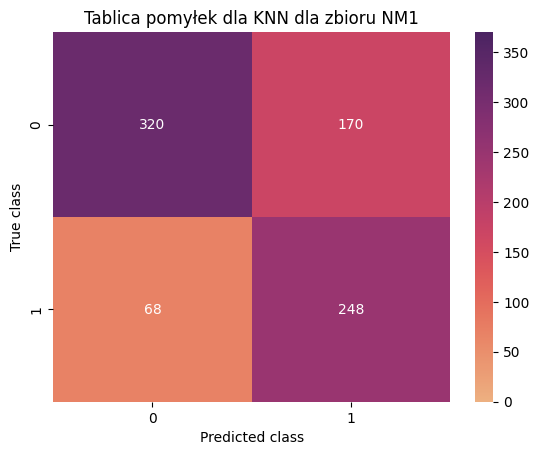

In [71]:
knn = KNeighborsClassifier(n_neighbors=17, weights='uniform', p=2, metric='minkowski').fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)


plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla KNN dla zbioru NM1')
plt.savefig('conf_matrix/nm1_knn.png')

26/26 [==============================] - 0s 480us/step
Accuracy: 0.72
Precision: 0.94
Sensitivity: 0.64
Specificty: 0.90


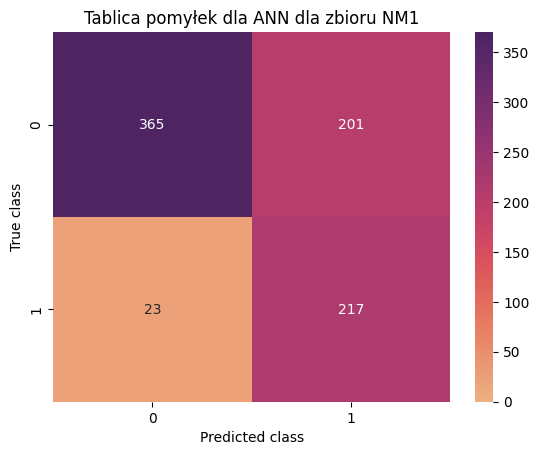

In [72]:
y_predict = ann.predict(X_test_std)
y_pred = (y_predict > 0.5)

matr = cf_matrix=confusion_matrix(y_pred, y_test)

metrics(matr)
plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla ANN dla zbioru NM1')
plt.savefig('conf_matrix/nm1_ann.png')

In [73]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve

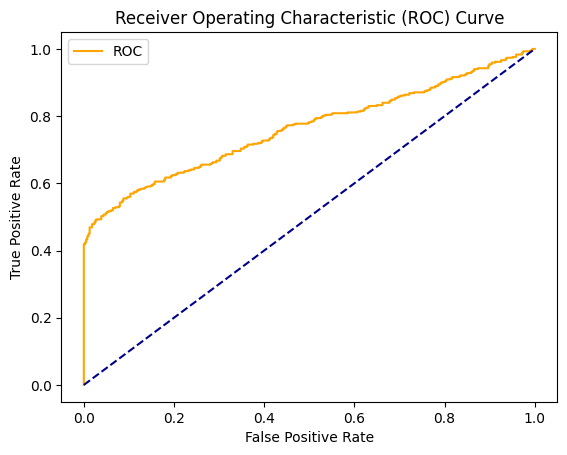

In [74]:
svc_rbf = SVC(kernel='rbf', C=0.75, gamma=0.4, random_state=0, probability=True).fit(X_train_std, y_train)
probs = svc_rbf.predict_proba(X_test_std)
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs)


plot_roc_curve(fper, tper)

26/26 [==============================] - 0s 480us/step


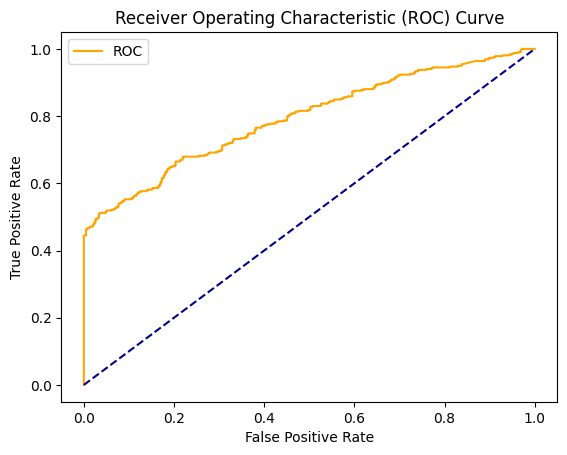

In [75]:
probs = ann.predict(X_test_std)  
fper, tper, thresholds = roc_curve(y_test, probs)


plot_roc_curve(fper, tper)